In [1]:
import os
import pickle
from equipment.Tektronix.oscilloscope import load_csv
from notebook.library.tau_qp import single_fit, dual_fit, plot_single_fit, plot_dual_fit

In [2]:
directory = '/Users/daniel/Johnson+Miller/KIDs/SKIP/STAR Cryo Version 0/2014-07-17_tau_qp_take_2'

In [3]:
with open(os.path.join(directory, 'pulse.pkl')) as f:
    pulse = pickle.load(f)
with open(os.path.join(directory, 'spike.pkl')) as f:
    spike = pickle.load(f)
with open(os.path.join(directory, 'delta.pkl')) as f:
    delta = pickle.load(f)

In [4]:
pulse_data = []
pulse_header = []
pulse_single = []
pulse_dual = []
for filename in pulse['file']:
    data, header = load_csv(os.path.join(directory, filename))
    pulse_data.append(data)
    pulse_header.append(header)

In [5]:
pulse_delay = 10e-6 # approximately
for data in pulse_data:
    pulse_single.append(single_fit(data.TIME, data.CH2, pulse['duration'] + pulse_delay))
    pulse_dual.append(dual_fit(data.TIME, data.CH2, pulse['duration'] + pulse_delay))

In [6]:
spike_data = []
spike_header = []
spike_single = []
spike_dual = []
for filename in spike['file']:
    data, header = load_csv(os.path.join(directory, filename))
    spike_data.append(data)
    spike_header.append(header)

In [7]:
spike_delay = 10e-6 # check
for data in spike_data:
    spike_single.append(single_fit(data.TIME, data.CH2, spike['duration'] + spike_delay))
    spike_dual.append(dual_fit(data.TIME, data.CH2, spike['duration'] + spike_delay))

In [8]:
delta_data = []
delta_header = []
delta_single = []
delta_dual = []
for filename in delta['file']:
    data, header = load_csv(os.path.join(directory, filename))
    delta_data.append(data)
    delta_header.append(header)

In [9]:
end_time = 6e-3
delta_delay = 40e-6
for data in delta_data:
    delta_single.append(single_fit(data.TIME[data.TIME < end_time], data.CH2[data.TIME < end_time], delta['duration'] + delta_delay, left_samples=20, right_samples=20))
    delta_dual.append(dual_fit(data.TIME[data.TIME < end_time], data.CH2[data.TIME < end_time], delta['duration'] + delta_delay, left_samples=20, right_samples=20))

Examine the deltas:

(-0.1, 1)

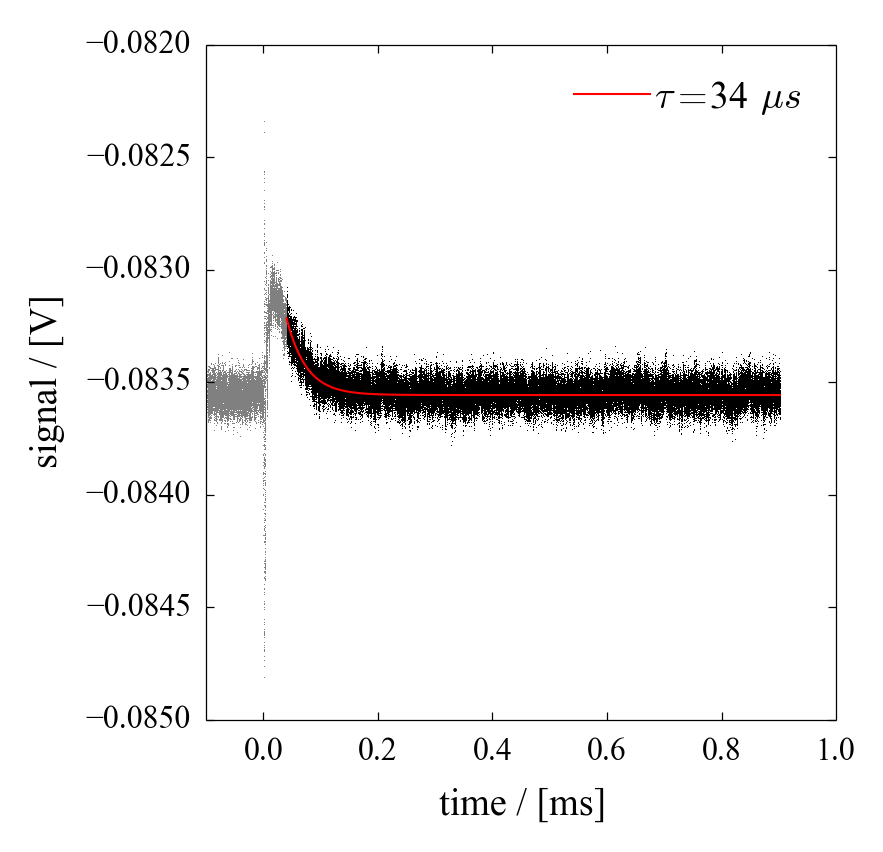

In [19]:
n = 11
fig, ax = plot_single_fit(delta_single[n].params, delta_data[n].TIME, delta_data[n].CH2)
ax.set_xlim(-0.1, 1)
#ax.set_ylim(-0.0840, -0.0805)

(-0.1, 1)

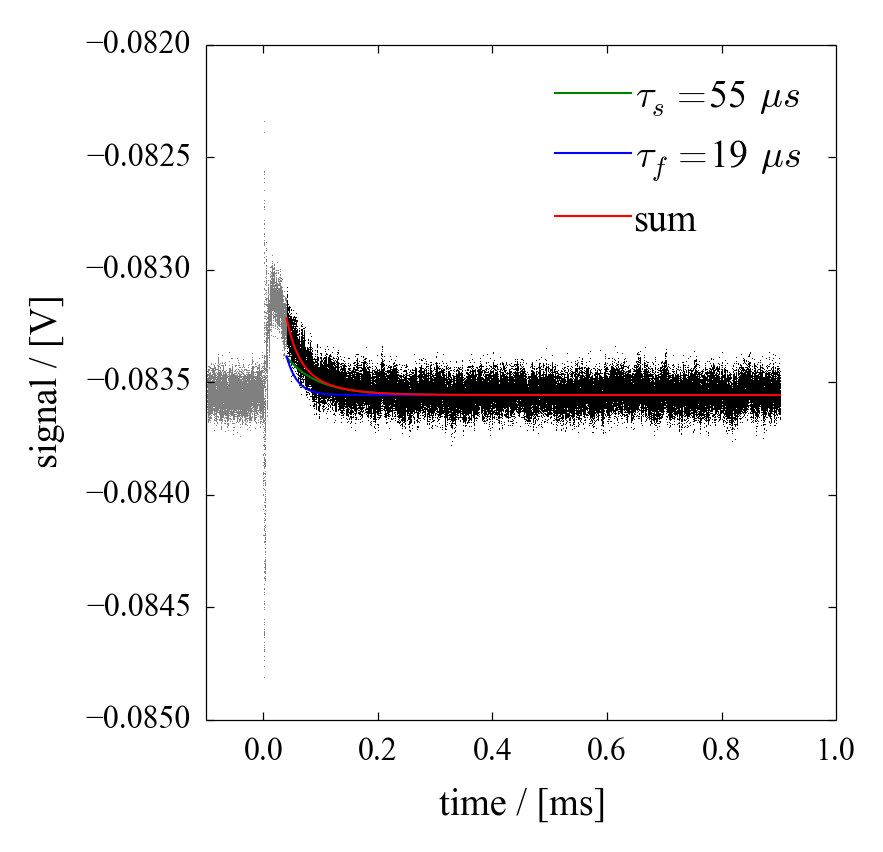

In [20]:
n = 11
fig, ax = plot_dual_fit(delta_dual[n].params, delta_data[n].TIME, delta_data[n].CH2)
ax.set_xlim(-0.1, 1)

There are 12 pulses, but the last four are too short and don't return to the baseline.

In [26]:
pulse_good = (np.arange(pulse['T'].size) < 8).astype(np.bool)
pulse_tau = 1e6*np.array([fit.params['tau'].value for fit in pulse_single])
pulse_tau_error = 1e6*np.array([fit.params['tau'].stderr for fit in pulse_single])
pulse_fast_tau = 1e6*np.array([fit.params['fast_tau'].value for fit in pulse_dual])
pulse_fast_amplitude = np.array([fit.params['fast_amplitude'].value for fit in pulse_dual])
pulse_slow_tau = 1e6*np.array([fit.params['slow_tau'].value for fit in pulse_dual])
pulse_slow_amplitude = np.array([fit.params['slow_amplitude'].value for fit in pulse_dual])
pulse_excursion = np.array([fit.params['excursion'].value for fit in pulse_dual])

Some of the deltas have the same problem.

In [27]:
delta_tau = 1e6*np.array([fit.params['tau'].value for fit in delta_single])
delta_fast_tau = 1e6*np.array([fit.params['fast_tau'].value for fit in delta_dual])
delta_fast_amplitude = np.array([fit.params['fast_amplitude'].value for fit in delta_dual])
delta_slow_tau = 1e6*np.array([fit.params['slow_tau'].value for fit in delta_dual])
delta_slow_amplitude = np.array([fit.params['slow_amplitude'].value for fit in delta_dual])
delta_excursion = np.array([fit.params['excursion'].value for fit in delta_dual])

In [16]:
paper_directory = '/Users/daniel/Code/notebook/mkid/McCarrick_2014/'
np.save(os.path.join(paper_directory, 'nine-element_pulse_T.npy'), pulse['T'])
np.save(os.path.join(paper_directory, 'nine-element_pulse_good.npy'), pulse_good)
np.save(os.path.join(paper_directory, 'nine-element_pulse_tau.npy'), pulse_tau)
np.save(os.path.join(paper_directory, 'nine-element_pulse_tau_error.npy'), pulse_tau_error)

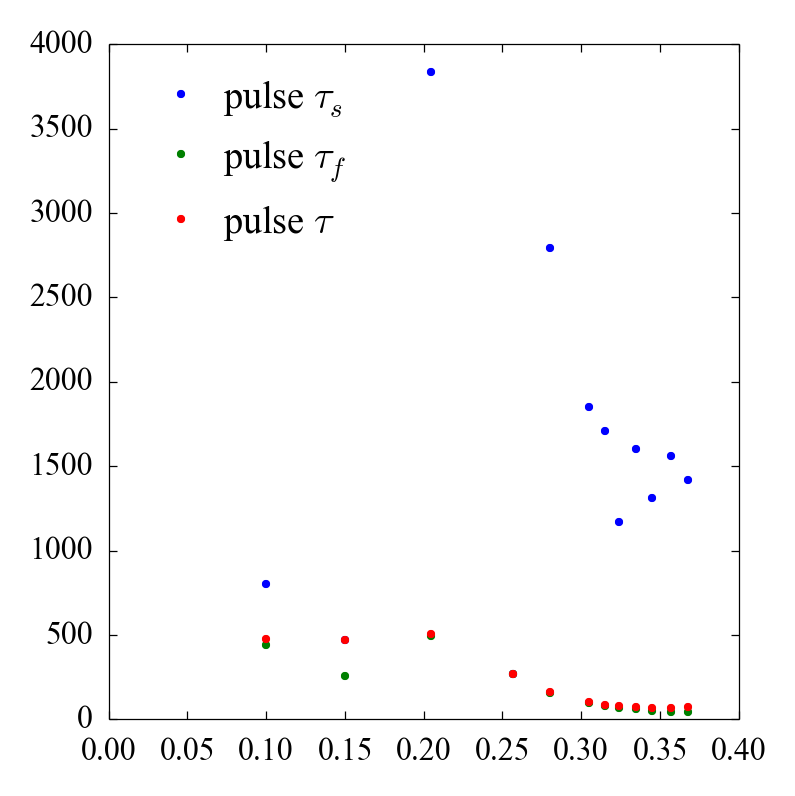

In [36]:
fig, ax = plt.subplots()
ax.plot(pulse['T'], pulse_slow_tau, '.b', label=r'pulse $\tau_s$')
ax.plot(pulse['T'], pulse_fast_tau, '.g', label=r'pulse $\tau_f$')
ax.plot(pulse['T'], pulse_tau, '.r', label=r'pulse $\tau$')
#ax.plot(delta['T'], delta_slow_tau, '.c', label=r'delta $\tau_s$')
#ax.plot(delta['T'], delta_fast_tau, '.m', label=r'delta $\tau_f$')
#ax.plot(delta['T'], delta_tau, '.y', label=r'delta $\tau$')
ax.set_xlim(0, 0.4)
#ax.set_ylim(0, 600)
ax.legend(loc='best')

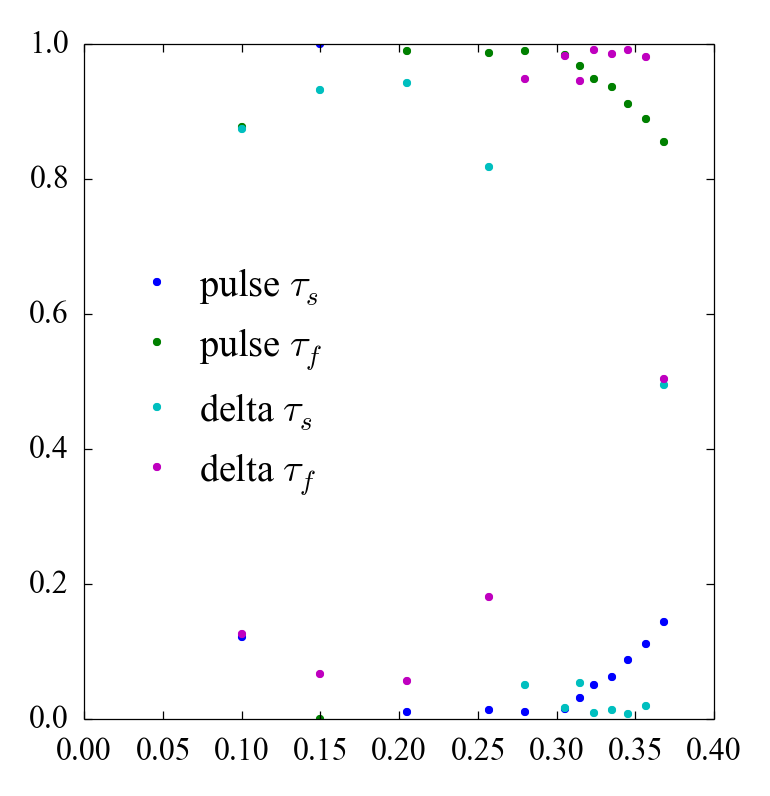

In [34]:
fig, ax = plt.subplots()
ax.plot(pulse['T'], pulse_slow_amplitude / pulse_excursion, '.b', label=r'pulse $\tau_s$')
ax.plot(pulse['T'], pulse_fast_amplitude / pulse_excursion, '.g', label=r'pulse $\tau_f$')
ax.plot(delta['T'], delta_slow_amplitude / delta_excursion, '.c', label=r'delta $\tau_s$')
ax.plot(delta['T'], delta_fast_amplitude / delta_excursion, '.m', label=r'delta $\tau_f$')
ax.set_xlim(0, 0.4)
ax.legend(loc='best')

(0, 0.4)

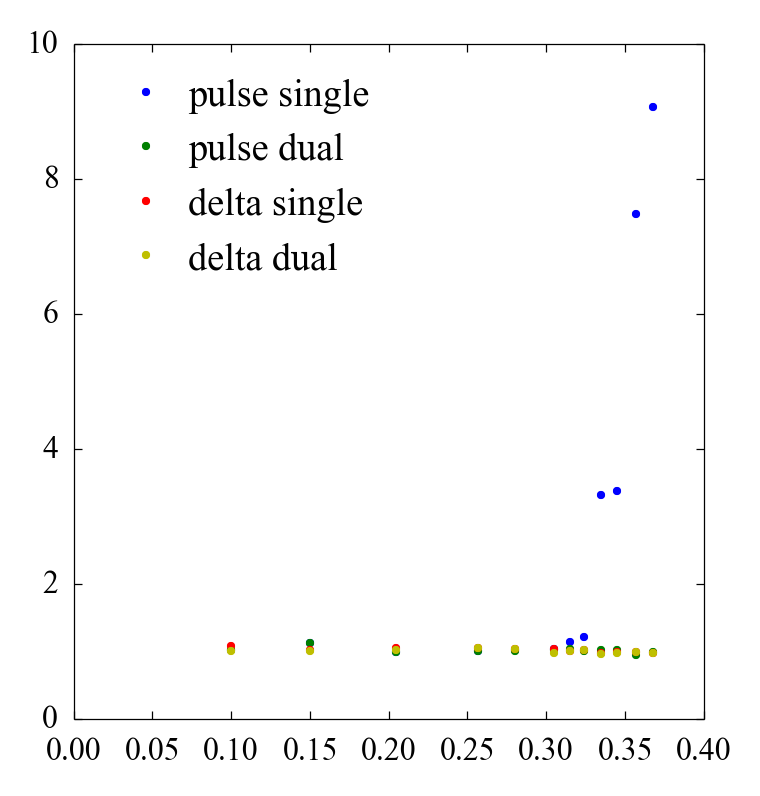

In [39]:
fig, ax = plt.subplots()
ax.plot(pulse['T'], [fit.redchi for fit in pulse_single], '.b', label='pulse single')
ax.plot(pulse['T'], [fit.redchi for fit in pulse_dual], '.g', label='pulse dual')
ax.plot(delta['T'], [fit.redchi for fit in delta_single], '.r', label='delta single')
ax.plot(delta['T'], [fit.redchi for fit in delta_dual], '.y', label='delta dual')
ax.legend(loc='best')
ax.set_xlim(0, 0.4)

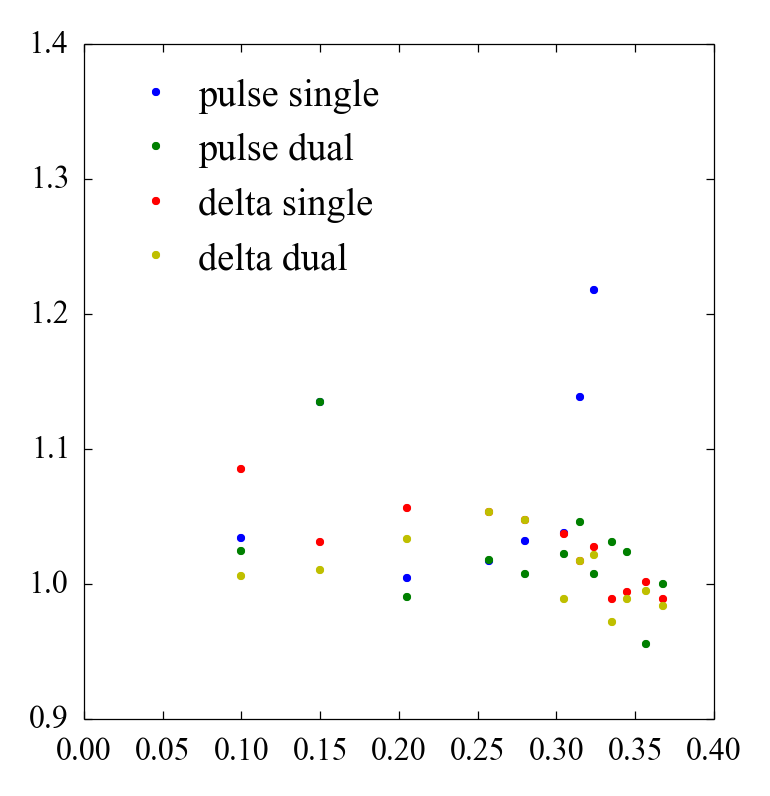

In [42]:
fig, ax = plt.subplots()
ax.plot(pulse['T'], [fit.redchi for fit in pulse_single], '.b', label='pulse single')
ax.plot(pulse['T'], [fit.redchi for fit in pulse_dual], '.g', label='pulse dual')
ax.plot(delta['T'], [fit.redchi for fit in delta_single], '.r', label='delta single')
ax.plot(delta['T'], [fit.redchi for fit in delta_dual], '.y', label='delta dual')
ax.legend(loc='best')
ax.set_xlim(0, 0.4)
ax.set_ylim(0.9, 1.4);